In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from copy import deepcopy

In [2]:
INPUTS_DIR = "2020/inputs"
INPUTS = [os.path.join(INPUTS_DIR, i) for i in os.listdir(INPUTS_DIR)]
INPUT = INPUTS[1]
# INPUT = INPUTS[-1]
INPUTS

['2020/inputs/c_soup.txt',
 '2020/inputs/a_solar.txt',
 '2020/inputs/b_dream.txt',
 '2020/inputs/e_igloos.txt',
 '2020/inputs/d_maelstrom.txt',
 '2020/inputs/f_glitch.txt']

In [7]:
with open(INPUT, 'r') as f:
	# OFFICE SHAPE
	line = f.readline()
	W, H = [int(i) for i in line.split()]

	# GRID
	GRID = []
	for i in range(H):
		line = [int(i) for i in f.readline()[:-1].replace("#", "0").replace("_", "1").replace("M", '2')]
		GRID.append(line)

	# DEVELOPERS
	N_DEV = int(f.readline())
	DEVS = []
	for i in range(N_DEV):
		line = f.readline().split()
		dev_info = {
			"c": line[0],
			"b": line[1],
			"n_skills": line[2],
			"skills": line[3:],
		}
		DEVS.append(dev_info)

	# MANAGERS
	N_MAN = int(f.readline())
	MANS = []
	for i in range(N_MAN):
		line = f.readline().split()
		man_info = {
			"c": line[0],
			"b": line[1]
		}
		MANS.append(man_info)


purple:	blocks
blue:	developer
yellow:	manager



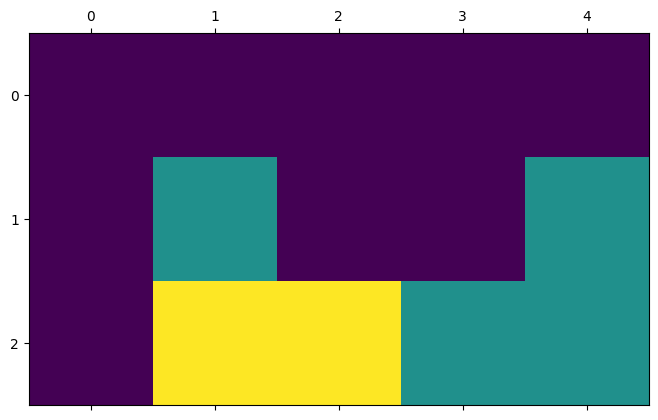

In [8]:
plt.matshow(GRID)
print("""
purple:	blocks
blue:	developer
yellow:	manager
""")

In [ ]:
[2, 1], [0, 1], [1, 2], [1, 0]

In [9]:
W, H, GRID, N_DEV, DEVS, N_MAN, MANS
print(
	"\nW", W,
	"\nH", H,
	"\nN_DEV", N_DEV,
	"\nN_MAN", N_MAN,
)


W 5 
H 3 
N_DEV 10 
N_MAN 3


In [71]:
w = deepcopy(W)
h = deepcopy(H)
grid = deepcopy(GRID)
n_dev = deepcopy(N_DEV)
devs = deepcopy(DEVS)
n_man = deepcopy(N_MAN)
mans = deepcopy(MANS)

# block_seats = []
dev_seats = []
man_seats = []
block_seats = []
for y, row in enumerate(grid):
    for x, col in enumerate(row):
        if col == 0:
            block_seats.append([x, y])
        if col == 1:
            dev_seats.append([x, y])
        if col == 2:
            man_seats.append([x, y])


# n_dev_seats = sum([len([i for i in row if i == 0]) for row in GRID])
# n_man_seats = sum([len([i for i in row if i == 1]) for row in GRID])
# n_block_seats = sum([len([i for i in row if i == 2]) for row in GRID])
# n_empty_seats = N_DEV_SEATS + N_MAN_SEATS

def update(nodes, pos, per, per_type):
    # UPDATING VALUES
    grid[pos[1]][pos[0]] = per

    if per_type == 1:
        devs.remove(per)
        dev_seats.remove(pos)
    if per_type == 2:
        mans.remove(per)
        man_seats.remove(pos)
    
    nodes.append([pos[0]+1, pos[1]])
    nodes.append([pos[0]-1, pos[1]])
    nodes.append([pos[0], pos[1]+1])
    nodes.append([pos[0], pos[1]-1])
    nodes_to_remove = []
    for i, node in enumerate(nodes):
        try: node_placeholder = grid[node[1]][node[0]]
        except: node_placeholder = None
        if node_placeholder == 1 or node_placeholder == 2:
            continue
        nodes_to_remove.append(i)
    nodes = [nodes[i] for i in range(len(nodes)) if i not in nodes_to_remove]

    return nodes

def select_on_pos(pos):
    pos_holder = grid[pos[1]][pos[0]]
    if pos_holder == 1:
        # select a dev
        per = devs[0]
    if pos_holder == 2:
        # select a man
        per = mans[0]
    print(per)

def find_next(nodes):

    if len(nodes) == 0:
        if len(dev_seats) > 0:
            pos = dev_seats[0]
            per = devs[0]
            per_type = 1
        else:
            pos = man_seats[0]
            per = mans[0]
            per_type = 0
    else:
        for node in nodes:
            select_on_pos(node)


        return nodes

    return update(nodes, pos, per, per_type)



nodes = []
for n in range(len(block_seats)):
    nodes = find_next(nodes)

    if n == 1:
        break

{'c': 'opn', 'b': '2'}
